<div style="border-radius:10px;
            border : black solid;
            background-color: black;
            font-size:100%;
            text-align: left">
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:cyan'><center> ⚕️🩺💉 Chronic Liver Disease 💉🩺⚕️  </center></h2> 




<img src ='https://assets.thehansindia.com/hansindia-bucket/intest_3516.jpg' >


### <h2 style='; font-weight: bold; font-size:300%; color:blue'><center> 🎯Workflow of the Project 🎯</center></h2>  

   
    
#### 1. <b> 🗂️Importing Libraries:</b> - To perform Data Manipulation,Visualization & Model Building.</b><br>
  
    
#### 2. <b>⏳ Loading Dataset:</b> - Load the dataset into a <b>suitable data structure using pandas.</b><br>

    
#### 3. <b>📑 Exploration of Dataset:</b> - Generate basic informations about the data.<br>
    
    
#### 4. <b>🧽 Data Cleaning:</b> -  <b> garbage cleaning, removing duplicate, and hadling missing values and treating outliers</b> <br>
 
   
 #### 5. <b>📊 Exploatory Data Analysis:</b> -  To  identify <b>trends, patterns, and relationships</b> among the variabels.<br>

    
#### 6. <b>⚙️ Data Preprocessing:</b> - To transform data for creating more accurate & robust model.<br>
    
    
#### 7. <b>🎯 Model building:</b>- To build <b>predictive models</b>, using various algorithms.<br>
    
    
#### 8. <b>⚡️ Model evaluation:</b> - To analyze the Model performance using metrics.<br>
    

 
#### 9. <b> 📝 Conclusion:</b> - Conclude the project by summarizing the <b>key findings.</b><br>
    



 <h2 style='; font-weight: bold; font-size:200%; color:blue'>🗂️Importing Libraries</h2>  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

 <h2 style='; font-weight: bold; font-size:200%; color:blue'>⏳ Loading Dataset</h2>  

In [2]:
dataset = 'indian_liver_patient.csv'
df = pd.read_csv(dataset)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


 <h2 style='; font-weight: bold; font-size:200%; color:blue'>⏳ Exoloring Dataset</h2>  

In [3]:
df.shape

(583, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[int64],Mean (sd) : 44.7 (16.2)min < med < max:4.0 < 45.0 < 90.0IQR (CV) : 25.0 (2.8),72 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACeElEQVR4nO3cP47aQBSA8TdhYQeIbBASdLQUkVJQcogcNkdIwQEQN6BDAmSEg4MxTkOxirKL/A+/HX+/foSLT+AZP2PSNBVAiy91XwDw1kvdF1A2Y0xXRDo5l1/SND2XeT3IxqkgjTHd0Wj0w/O8YZ71x+PxYIz5SZT1cSpIEel4njdcLBZn3/ejLAuDILDL5XK42+06IkKQNXEtSBER8X0/Go/Hv3Ms7eb9TG4VyuFkkM/GrUJ5CLIc3CqUhCBLVMetgms4h4QqBAlV+Ml+I0mStoh4xpisS73b7dau4JIahyDvwjBsx3H8fTqdtlqtVqaNSRzHNkmSb1EU/RKRPPeQuCPIu8vl8mKt7c3n82gymRyyrN1sNsP1et27Xq+tqq6vKQjyH/1+P/NO+XA4sEsuCZsaqEKQUIUgoQpBQhWChCrsshUocCAv4tjoGkHWrMiBvIh7o2sEWbMiB/Iujq4RpBJ5DuTvnDqUZ1MDVQgSqhAkVCFIqEKQUIUgoQpBQhWChCoECVVUPqkp8D85vP33yakLssj/5PD23+enLkgp8D85TXz7z7XRNY1Biki+/8lp2tt/Lo6uqQ0Sj7k4ukaQDnBpdI1jH6hCkFCFIKEKQUKVyjY1PG1BHpUEydMW5FXVNyRPW5BLpeeQPG1BVmxqoApBQhWChCoECVUIEqow7dNgGod7CbKhtA73EmRDaR3uJciG0zbcy6YGqhAkVPnwJ5sRMjzbu0EyQoY6fPQNyQgZnu7hLpsRMvxPVYfqHPsgsyoP1R8GGQSBzfqBp9PJioiEYWi3222PtW6t3e/3X621vdlsZgaDwZ8sa8/n8+tqtXr3UP0vNDit8FxtoVUAAAAASUVORK5CYII="">",0(0.0%)
2,Gender[object],1. Male2. Female,441 (75.6%)142 (24.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABPklEQVR4nO3bQWrDMBRF0a9iQjORMAYvxovoYrsI7cYYa9CETJRBZqGTOuLpk96zgg+5CcT4hVqrAQrBzM5mdup9CJq61VovvY94NkzT9BVjHHsfgnZKKVsI4dtbcEOMcVyW5ZJSuvY+Bq/b9/0z5zyu63oyM1+xmZmllK7zPP/0PgbNnHsf8JuP3gfg/yA2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUFmMHu8cNf7ELTh+bMcSilbznk0py/c4e9KKZuZ3Xrf8YzBy3tyOXgJTPmg4vmXzeW3E8e5nfJ5naPhOJdTPs9zNBznecrHv+M3w0NdyBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CDjcsrn7R604XbK53WOhuMYvEDmDgpbat8xea00AAAAAElFTkSuQmCC"">",0(0.0%)
3,Total_Bilirubin[float64],Mean (sd) : 3.3 (6.2)min < med < max:0.4 < 1.0 < 75.0IQR (CV) : 1.8 (0.5),113 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABx0lEQVR4nO3XvU7CcBSG8XPkI4VoC8HA1pXNgZHFO/BiXd1h5i5YCC0BgTbk72TioGgbia/h+a3kPWnIkxI8hGCAipu/fgDgo+a5D929Y2btmreLEMK+5hZX6ssg3b0zGAye4jju1zm82WzW7v5MlKji3BuyHcdxfzqd7pMkOVQ5mud5NJvN+qvVqm1mBIkfO/uTbWaWJMlhOBy+1rjdqbHBleNPDaQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQ0L3X4dDq1zCx29zrzIoSw/+VHwj9wkSB3u12rLMuHNE0bjUbjUHWfZdnW3V/MrPLWiPlfu0iQRVE0oyjqTiaTw2g0WlfZLpfLu/l8/pim6T0xX59vg8zzPKp6dLvdVt68K8uyGUVRdzwee6/XO1bZZll2u1gs/ipm/NwxhPDpd/wGd3ls4KURPtEAAAAASUVORK5CYII="">",0(0.0%)
4,Direct_Bilirubin[float64],Mean (sd) : 1.5 (2.8)min < med < max:0.1 < 0.3 < 19.7IQR (CV) : 1.1 (0.5),80 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACRElEQVR4nO3XO68SURSG4bW5ZXOb4WKgo7EgwcSCksbO0h97Wnt6Yu0fIOEyyBw4TMax0ESLIzqDyKe8T0vWXlO8w864LMsMUFG69QMAP6qc+9E5VzezWsGzT1mWHQrO4k79NEjnXL3f778LgqBb5ODdbrdxzj0QJfI49w9ZC4KgO5vNDmEYHvMcGkWRn8/n3dVqVTMzgsRvO3tlm5mFYXgcDAaPBc6uF5jBneOjBlIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIq1zo4TdOqmQXOuSLjpyzLDn/4kfAPuEqQcRxXkyR5PRqNyuVy+Zh3frfbbZxzD0R5f64S5Ol0qnjvG9Pp9DgcDjd5ZqMo8vP5vLtarWpmRpB35mpXtplZs9k8DgaDx7xzaZoGdoPr3jlXN7NakdlL9uK7qwZZxKXX/Xa73Tvn3ptZ3lnf6/XehmHYzLvzwr1mXz8uPxfZa//Zi/DLIKMo8nkP3e/33swsjmO/XC4beWbX63XLe98Yj8eu0+k85ZndbretxWLxZjQavc

 <h2 style='; font-weight: bold; font-size:200%; color:blue'> 🧽 Cleaning of dataset</h2>  

### **Checking and Removing Duplicates**

In [6]:
# Remove duplicates

def drop_dup(df):
    if df.duplicated().any() == True:
        print('The total duplicate row before removing duplicate:', df.duplicated().sum())
        df.drop_duplicates(inplace=True , keep = 'last')  # Remove duplicates
        df = df.reset_index(drop=True) #Reset the index
        print('The total duplicate row after removing duplicate:', df.duplicated().sum(), ' \nshape of dataset after removing duplicate columns :',df.shape)
    else:
        return 'No duplicate entries'
drop_dup(df)

The total duplicate row before removing duplicate: 13
The total duplicate row after removing duplicate: 0  
shape of dataset after removing duplicate columns : (570, 11)


#### Checking null values

In [7]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace = True)

 <h2 style='; font-weight: bold; font-size:200%; color:blue'> 📊 Descriptive Statistics</h2> 

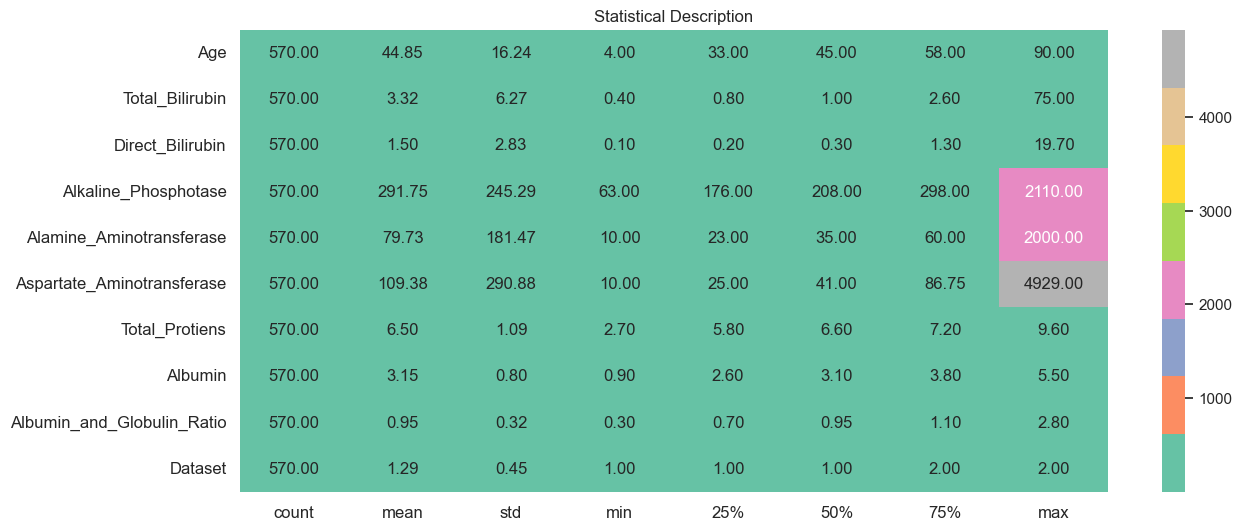

In [9]:
desc=df.describe().T
def descriptive_stats(df):
   
    
    plt.figure(figsize=(14,6))
    sns.heatmap(df, annot=True, cmap='Set2', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()


descriptive_stats(desc)

In [10]:
#!pip install skimpy

In [11]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 570    │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 11     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA   ┃ NA %    ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Age                          │    0 │       0 │     45 │     16 │     4 │    33 │    58 │     90 │  ▂▅██▄  │  │
│ │ Total_Bilirubin              │    0 │       0 │    3.3 │    6.3 │   0.4 │   0.8 │   2.6 │     75 │    █    │  │
│ │ Direct_Bilirubin             │    0 │       0 │    1.5 │    2.8 │   0.1 │   0.2 │   1.3 │     20 │    █    │  │
│ │ Alkaline_Phosphotase         │    0 │       0 │    290 │    250 │    63 │   180 │   300 │   2100 │   █▁    │  │
│ │ Alamine_Aminotransferase     │    0 │       0 │     80 │    180 │    10 │    23 │    60 │   2000 │    █    │  │
│ │ Aspartate_Aminotransferase   │    0 │       0 │    110 │    290 │    10 │    25 │    87 │   4900 │    █    │  │
│ │ Total_Protiens               │    0 │       0 │    6.5 │    1.1 │   2.7 │   5.8 │   7.2 │    9.6 │   ▁▆█▄  │  │
│ │ Albumin                      │    0 │       0 │    3.1 │    0.8 │   0.9 │   2.6 │   3.8 │    5.5 │  ▁▄█▇▄  │  │
│ │ Albumin_and_Globulin_Ratio   │    0 │       0 │   0.95 │   0.32 │   0.3 │   0.7 │   1.1 │    2.8 │  ▄█▃▁   │  │
│ │ Dataset                      │    0 │       0 │    1.3 │   0.45 │     1 │     1 │     2 │      2 │ █    ▃  │  │
│ └──────────────────────────────┴──────┴─────────┴────────┴────────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                    │       0 │          0 │                            1 │                      570 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Checking Unique values of different features

                     Total no. of Unique Values
Gender                          2
Albumin                        40
Total_Protiens                 58
Albumin_and_Globulin_Ratio     69
Age                            72
Direct_Bilirubin               80
Total_Bilirubin               113
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Alkaline_Phosphotase          263
dtype: int64


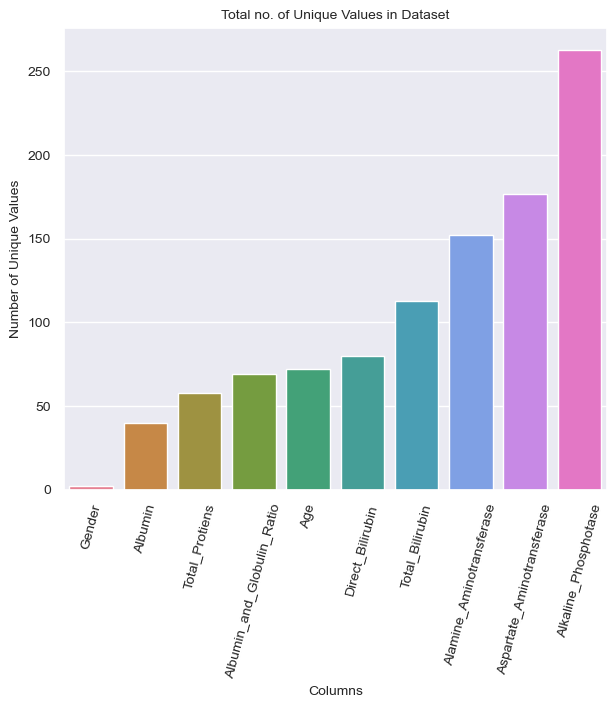

In [12]:
# Count the number of unique values in each column
def check_unquie_count(df):
    unique_counts = df.nunique().sort_values()
    print('=='*30)
    print('  '*10, 'Total no. of Unique Values')
    print('=='*30)
    print(unique_counts)
    print('=='*30)
# Create a bar plot or count plot of unique values
    #plt.style.use('dark_background')
    plt.figure(figsize=(7, 6))
    sns.barplot(x=unique_counts.index, y=unique_counts.sort_values(),palette='husl' )

    plt.xticks(rotation=75, fontsize= 10)
    plt.yticks( fontsize= 10 )
    plt.xlabel('Columns',fontsize=10)
    plt.ylabel('Number of Unique Values', fontsize=10)
    plt.title('Total no. of Unique Values in Dataset', fontsize=10)

# Display the plot
    plt.show()

check_unquie_count(df.iloc[:,0:-1])

In [13]:
df['Dataset'].replace({2:'Hepatic', 1:'Non-hepatic'},inplace = True)


In [14]:
df['Dataset'].unique()

array(['Non-hepatic', 'Hepatic'], dtype=object)

# The total count of male and female in the dataset and  male and female in the dataset having liver disease:

total count of male and female  :Gender
Male      430
Female    140
Name: count, dtype: int64
------------------------------------------------------------------------------------------
Count of male and female in the dataset having liver disease : Gender
Male      115
Female     49
Name: count, dtype: int64


<Axes: xlabel='Gender'>

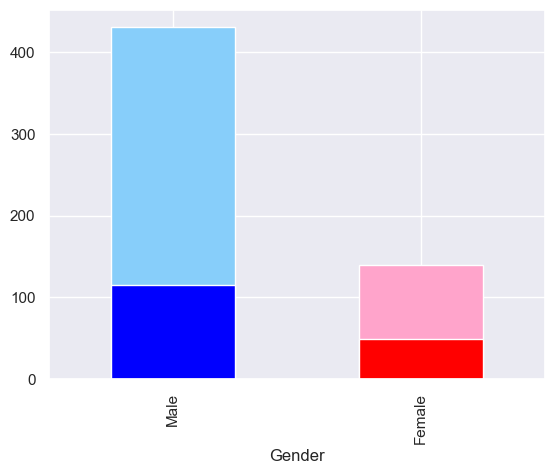

In [15]:
gender_count = df['Gender'].value_counts()
hepatic_gender_count =df[(df.Dataset =='Hepatic')]['Gender'].value_counts()
print('==='*30)
print(f'total count of male and female  :{gender_count}')
print('---'*30)
print(f'Count of male and female in the dataset having liver disease : {hepatic_gender_count}')
print('==='*30)

gender_count.plot( kind='bar',  color=['#87CEFA','#FFA4CB', ])

hepatic_gender_count.plot( kind='bar',  color=[ 'blue','red', ])

# The total count of male and female in the dataset and  having liver disease:

In [16]:
grouped_gender_data = df.groupby(['Gender', 'Dataset'])[['Gender', 'Dataset']].value_counts()#.size()#.reset_index(name='Count')
print(grouped_gender_data)

#df.reset_index??

Gender  Dataset    
Female  Hepatic         49
        Non-hepatic     91
Male    Hepatic        115
        Non-hepatic    315
Name: count, dtype: int64


Percentage of  male and female in the dataset :Gender
Male      75.44
Female    24.56
Name: count, dtype: float64%
------------------------------------------------------------------------------------------
Percentage of total male and female in the dataset :Gender
Male      20.18
Female     8.60
Name: count, dtype: float64


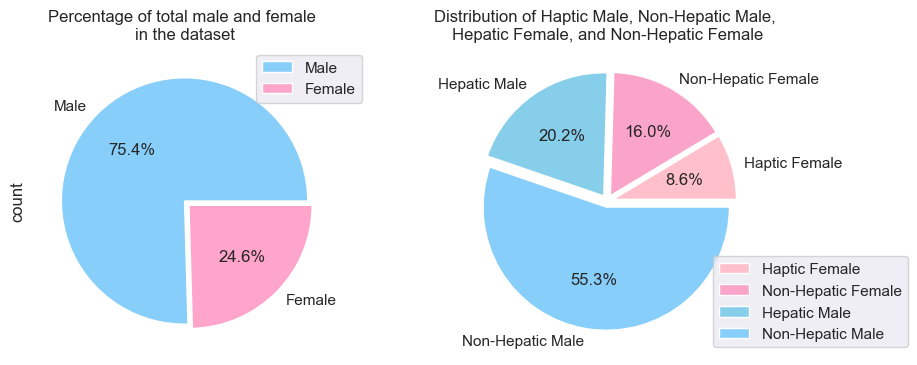

<Figure size 640x480 with 0 Axes>

In [17]:
total_gender =df['Gender'].value_counts()*100/len(df)
hepatic_gender= df[(df.Dataset =='Hepatic')]['Gender'].value_counts()*100/len(df)
print('==='*30)
print(f'Percentage of  male and female in the dataset :{total_gender.round(2)}%')
print('---'*30)
print(f'Percentage of total male and female in the dataset :{hepatic_gender.round(2)}')

print('==='*30)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
df['Gender'].value_counts().plot(
    kind='pie',
    explode=[0, 0.05],     # Explode the second category to emphasize it
    autopct='%1.1f%%',         # Display percentage with one decimal place
    #shadow=True,               # Add a shadow effect to the chart
    colors=[ '#87CEFA','#FFA4CB', ]  # Custom colors for the pie chart
)
plt.title('Percentage of total male and female \nin the dataset')
plt.legend(loc='upper right',bbox_to_anchor=(1.1, 1.0))
plt.subplot(1,2,2)
data = grouped_gender_data#grouped_gender_data['Count'].tolist()
data
# Labels for the pie chart
labels = ['Haptic Female', 'Non-Hepatic Female', 'Hepatic Male', 'Non-Hepatic Male']

# Light shade colors for the pie chart
colors = ['pink', '#FAA4CA','skyblue', '#87CEFA', ]

# Plotting the pie chart
plt.pie(data, labels=labels,explode=[0.05,0.05, 0.05,0.05], colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Haptic Male, Non-Hepatic Male, \nHepatic Female, and Non-Hepatic Female')
plt.legend(loc='lower right',bbox_to_anchor=(1.5, 0.0))
plt.show()
plt.tight_layout()


### - In the dataset there are 75% male and 24% female.
### - 8.6% female and 20.2% male  of this dataset are affected with liver disease.

# Details of male affected and not affected with liver disease 

Dataset
Non-hepatic    315
Hepatic        115
Name: count, dtype: int64


Text(0.5, 1.0, ' Percentage of male having liver disease')

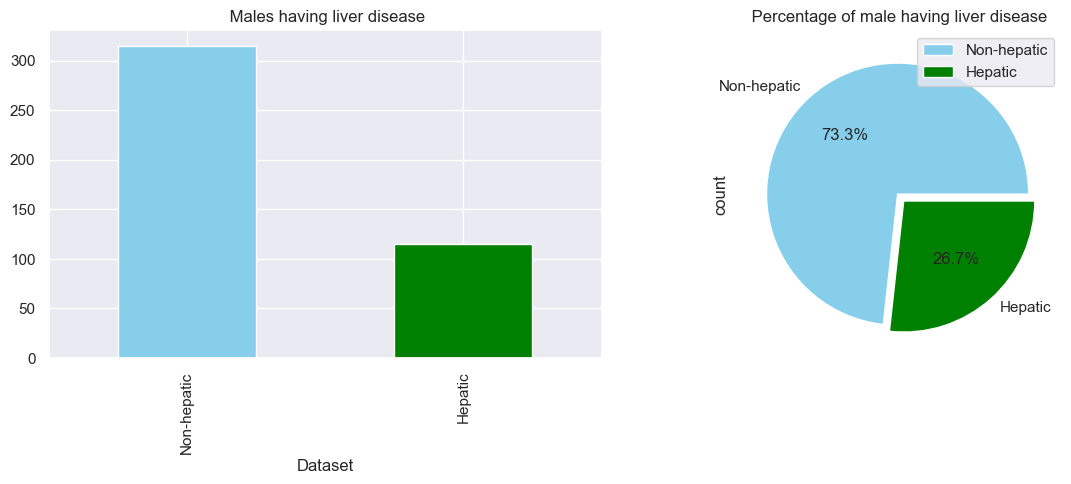

In [18]:
print(df[(df.Gender =='Male')]['Dataset'].value_counts())
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df[(df.Gender =='Male') ]['Dataset'].value_counts().plot( kind='bar',  color=['skyblue',  'green'])

plt.title(' Males having liver disease')
plt.subplot(1,2,2)
df[(df.Gender =='Male')]['Dataset'].value_counts().plot(
    kind='pie',
    explode=[0, 0.07],     # Explode the second category to emphasize it
    autopct='%1.1f%%',         # Display percentage with one decimal place
    #shadow=True,               # Add a shadow effect to the chart
    colors=['skyblue',  'green']  # Custom colors for the pie chart
)
plt.legend(loc='upper right')
plt.tight_layout()
plt.title(' Percentage of male having liver disease')

### 27% of males are diagonised with liver disease.

# Details of female affected and not affected with liver disease 

Dataset
Non-hepatic    91
Hepatic        49
Name: count, dtype: int64


Text(0.5, 1.0, ' Percentage of females having liver disease')

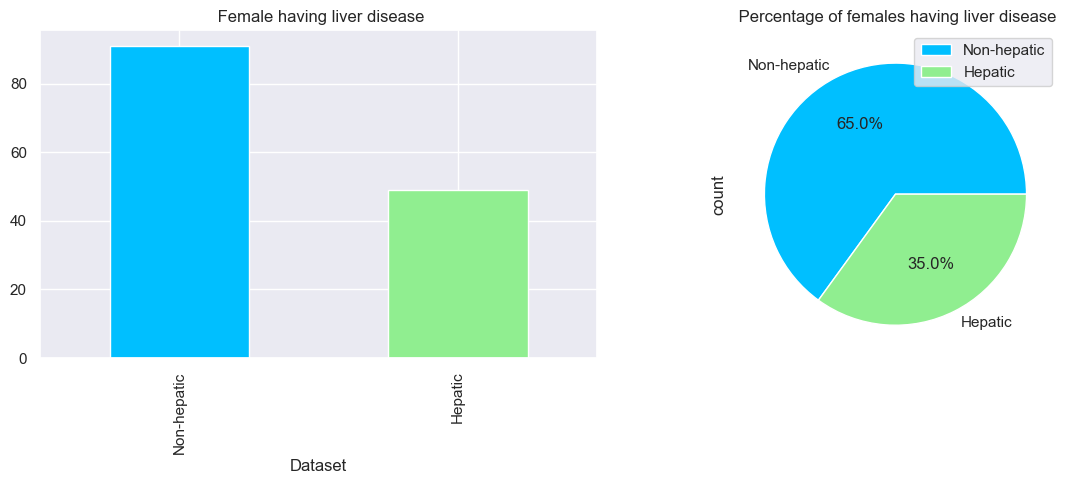

In [19]:
print(df[(df.Gender =='Female')]['Dataset'].value_counts())
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df[(df.Gender =='Female') ]['Dataset'].value_counts().plot( kind='bar',  color=['deepskyblue',  'lightgreen'])
plt.title(' Female having liver disease')
plt.subplot(1,2,2)
df[(df.Gender =='Female')]['Dataset'].value_counts().plot(
    kind='pie',
    #explode=[0.1, 0.1,0,0, 0, 0],     # Explode the second category to emphasize it
    autopct='%1.1f%%',         # Display percentage with one decimal place
    #shadow=True,               # Add a shadow effect to the chart
    colors=['deepskyblue',  'lightgreen']  # Custom colors for the pie chart
)
plt.legend(loc='upper right')
plt.tight_layout()
plt.title(' Percentage of females having liver disease')

### 35% of females are diagonised with liver disease.

<Axes: xlabel='Dataset', ylabel='Age'>

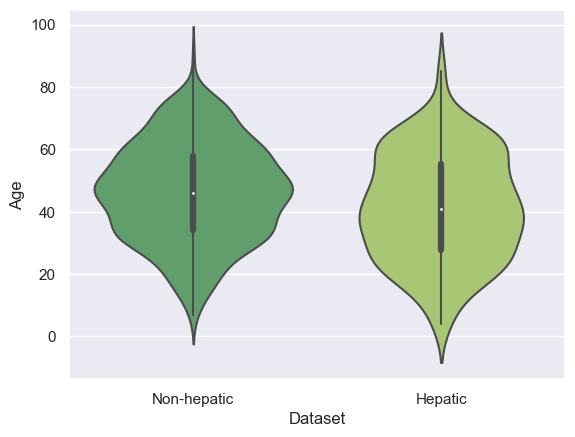

In [20]:
sns.violinplot(x='Dataset', y='Age', data=df,palette='summer',)

### Liverpatitents are mostly in the range 20 to 70

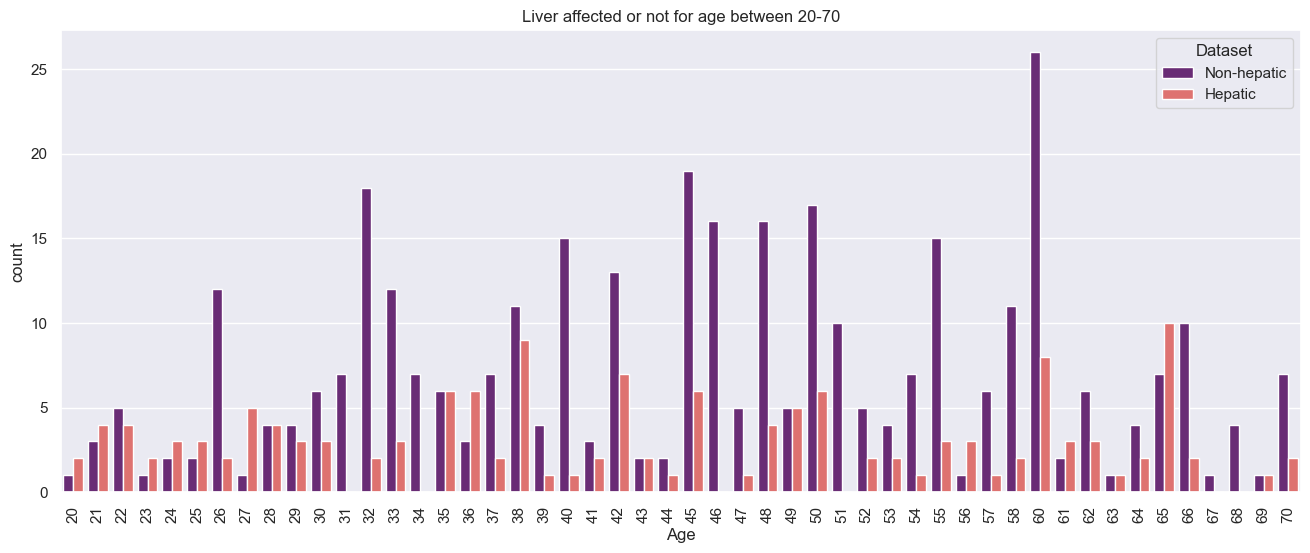

In [21]:
Liver_age = df[(df['Age']<=70) & (df['Age']>=20 )][['Age','Dataset']]
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
ax = sns.countplot(x= Liver_age['Age'], hue= Liver_age['Dataset'] , palette ='magma')
ax.set_title('Liver affected or not for age between 20-70')
plt.show()

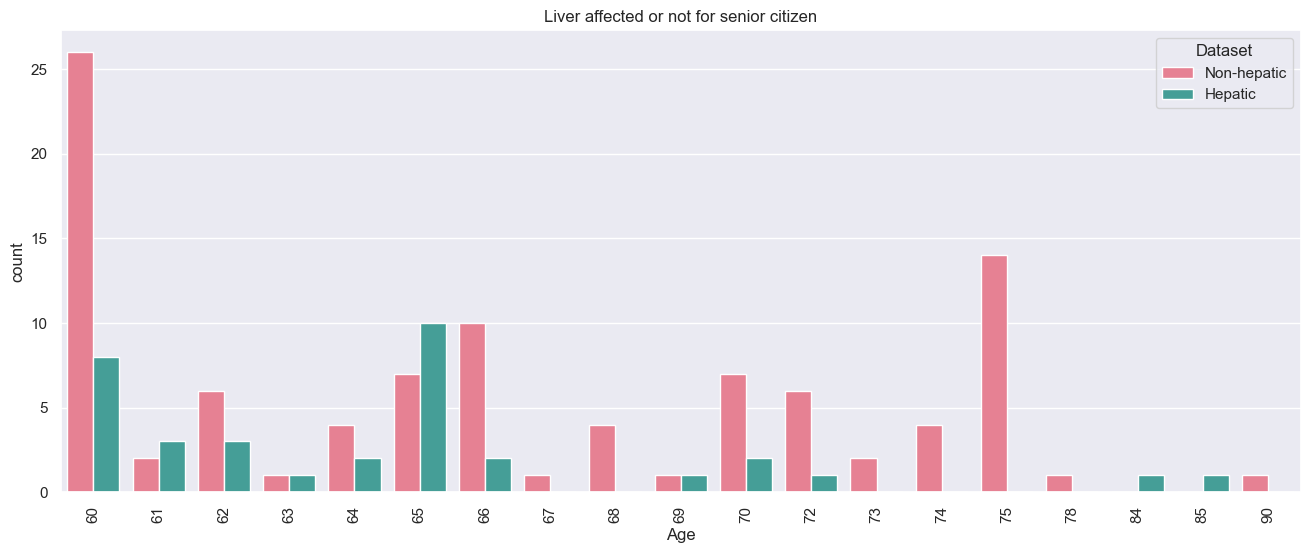

In [22]:
Liver_sr = df[(df['Age']>=60)][['Age','Dataset']]
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
ax = sns.countplot(x= Liver_sr['Age'] , hue= Liver_sr['Dataset'], palette ='husl')
ax.set_title('Liver affected or not for senior citizen')
plt.show()

### Distribution of `Total_Bilirubin`, `Direct_Bilirubin` and `Albumin_and_Globulin_Ratio` for hepatic patitent

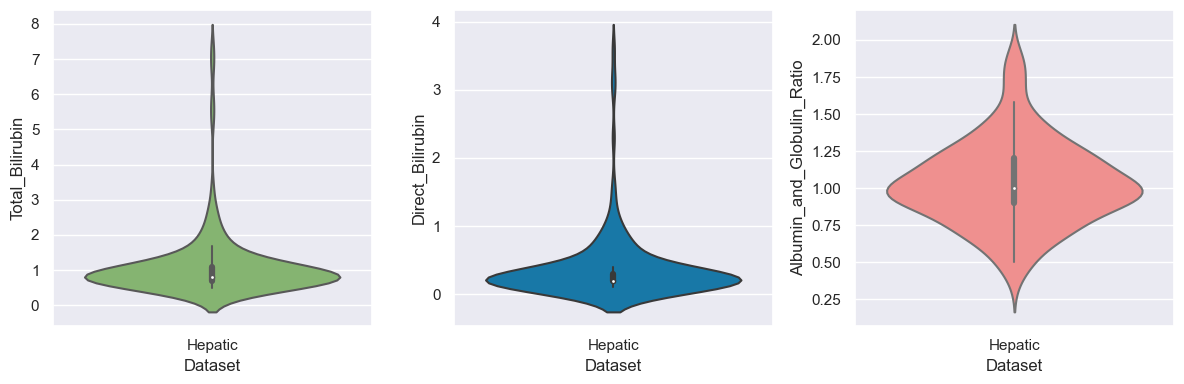

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.violinplot(x='Dataset', y='Total_Bilirubin', data=df[df.Dataset =='Hepatic'],palette='summer',)
plt.subplot(1,3,2)
sns.violinplot(x='Dataset', y='Direct_Bilirubin', data=df[df.Dataset =='Hepatic'],palette='winter',)
plt.subplot(1,3,3)
sns.violinplot(x='Dataset', y='Albumin_and_Globulin_Ratio', data=df[df.Dataset =='Hepatic'],palette='spring',)
plt.tight_layout()

### Bivariate Analysis of `Total_Bilirubin`, `Direct_Bilirubin` ,`Albumin`  and `Albumin_and_Globulin_Ratio`

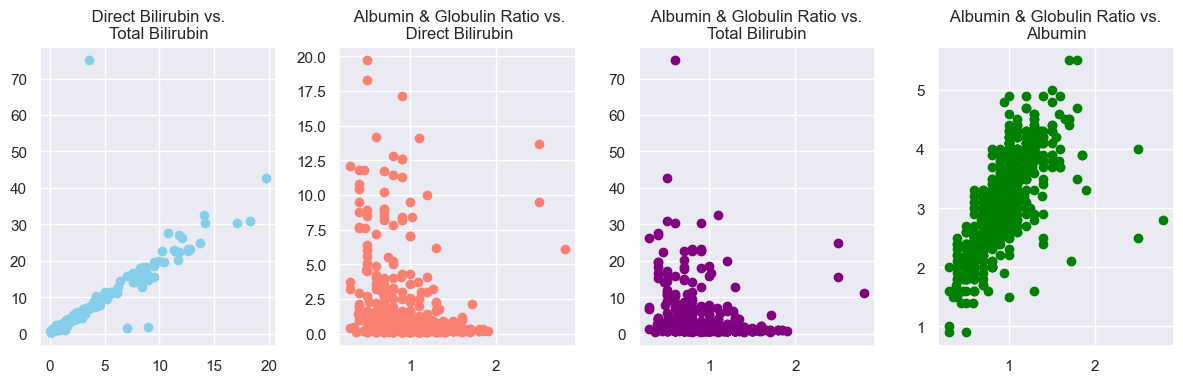

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.scatter(df['Direct_Bilirubin'], df['Total_Bilirubin'],color='skyblue')
plt.title(' Direct Bilirubin vs. \nTotal Bilirubin')
plt.subplot(1,4,2)
plt.scatter(df['Albumin_and_Globulin_Ratio'],df['Direct_Bilirubin'], color='#FA8072')
plt.title(' Albumin & Globulin Ratio vs.\n Direct Bilirubin')
plt.subplot(1,4,3)
plt.scatter(df['Albumin_and_Globulin_Ratio'], df['Total_Bilirubin'], color='purple')
# plt.xlabel('Direct Bilirubin')
# plt.ylabel('Total Bilirubin')
plt.title(' Albumin & Globulin Ratio vs. \nTotal Bilirubin')
plt.subplot(1,4,4)
plt.scatter(df['Albumin_and_Globulin_Ratio'], df['Albumin'], color='green')
# plt.xlabel('Direct Bilirubin')
# plt.ylabel('Total Bilirubin')
plt.title(' Albumin & Globulin Ratio vs. \nAlbumin')
plt.tight_layout()
plt.show()

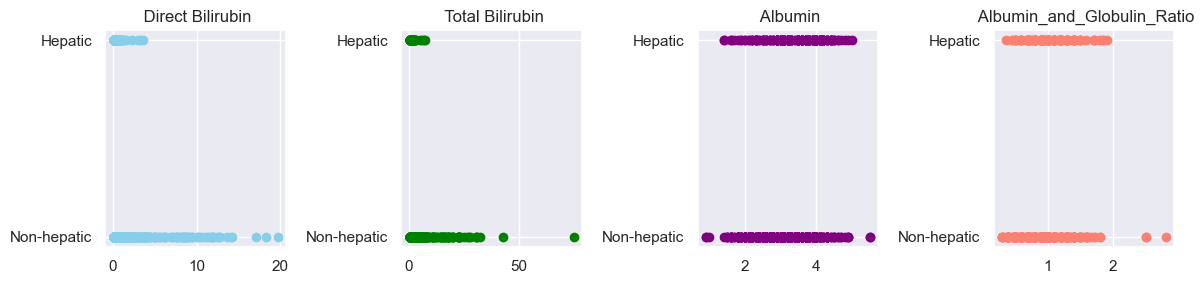

In [25]:
plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
plt.scatter(df['Direct_Bilirubin'], df['Dataset'],color='skyblue')
plt.title(' Direct Bilirubin')
plt.subplot(1,4,2)
plt.scatter(df['Total_Bilirubin'], df['Dataset'], color='green')
plt.title(' Total Bilirubin')
plt.subplot(1,4,3)
plt.scatter(df['Albumin'], df['Dataset'], color='purple')
plt.title(' Albumin')
plt.subplot(1,4,4)
plt.scatter(df['Albumin_and_Globulin_Ratio'],df['Dataset'], color='#FA8072')
plt.title(' Albumin_and_Globulin_Ratio')

plt.tight_layout()
plt.show()

## Distribution

In [26]:
def num_dist(column, target= 'Dataset'):
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    sns.boxplot(x=target,y=column, data=df, palette="plasma")
    plt.title(f"{column.title()} vs Dataset")

    plt.subplot(1,3,2)
    sns.violinplot(x=target, y=column, data=df,palette='Set1',)
    
    plt.subplot(1,3,3)
    sns.histplot(data=df,x=column,kde=True,hue= target, palette="summer")
    plt.title(f"Distribution of {column.title()} ")
    plt.tight_layout()
    plt.show()

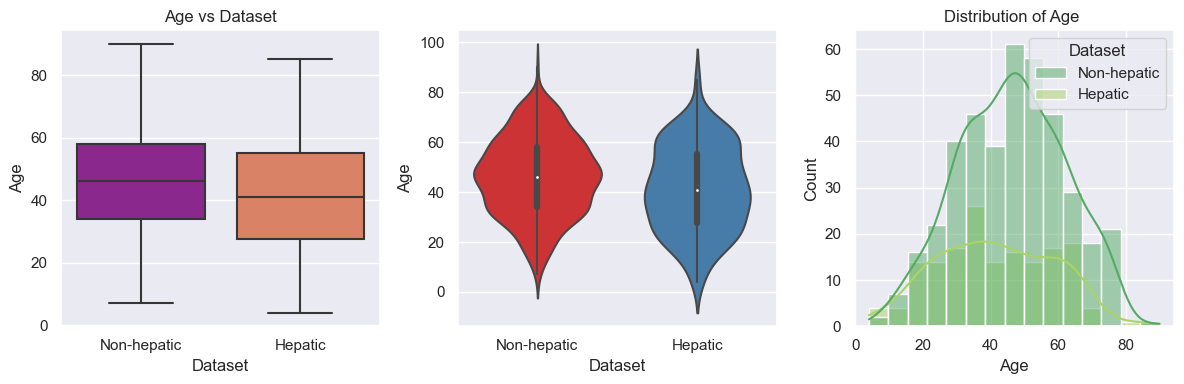

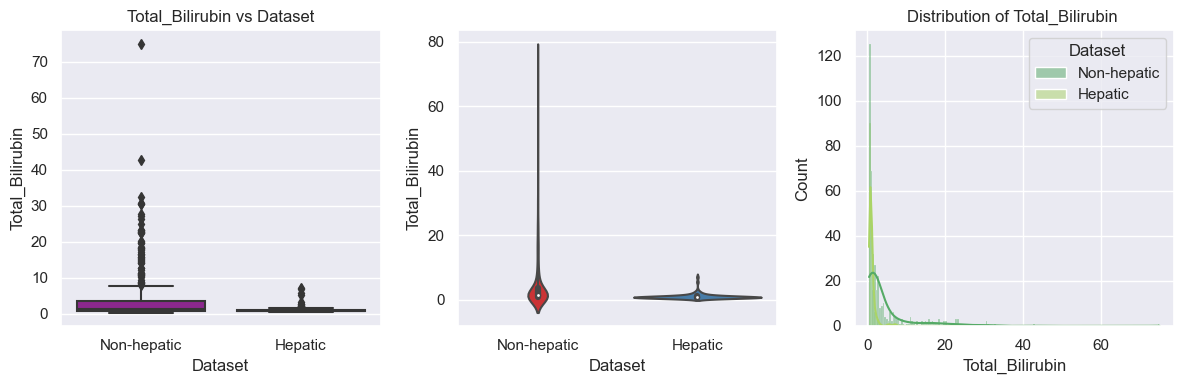

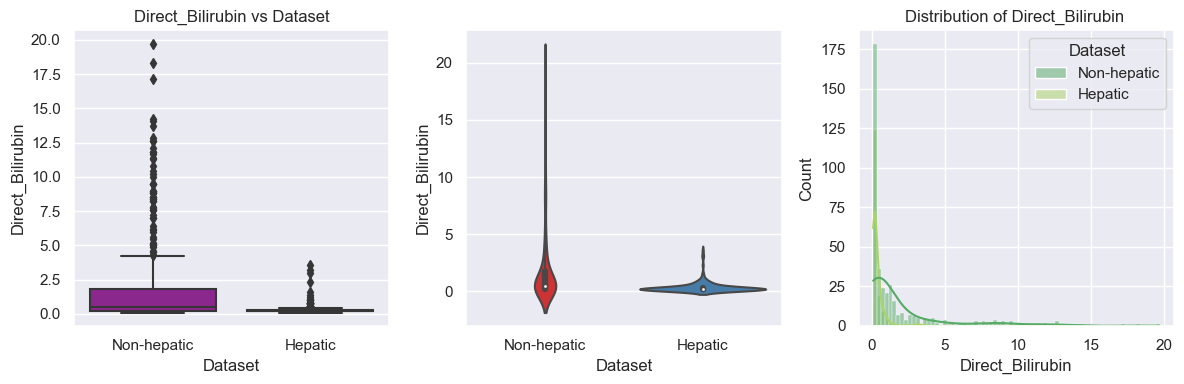

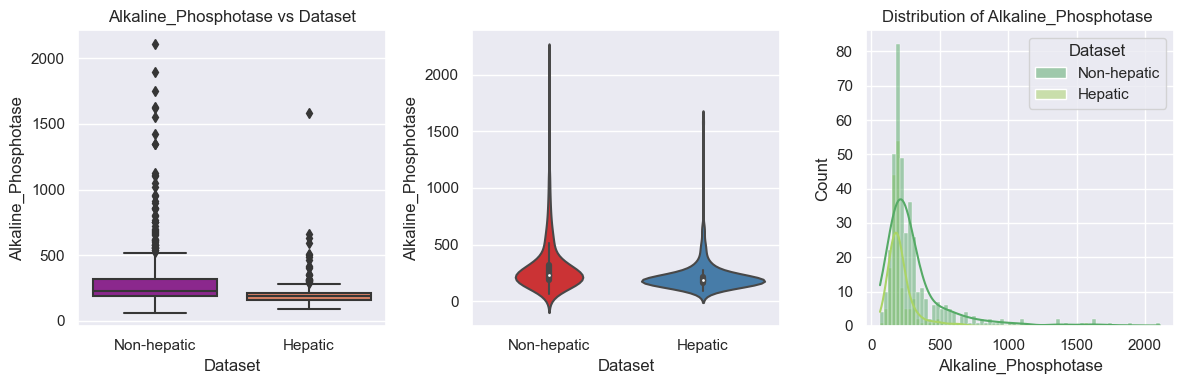

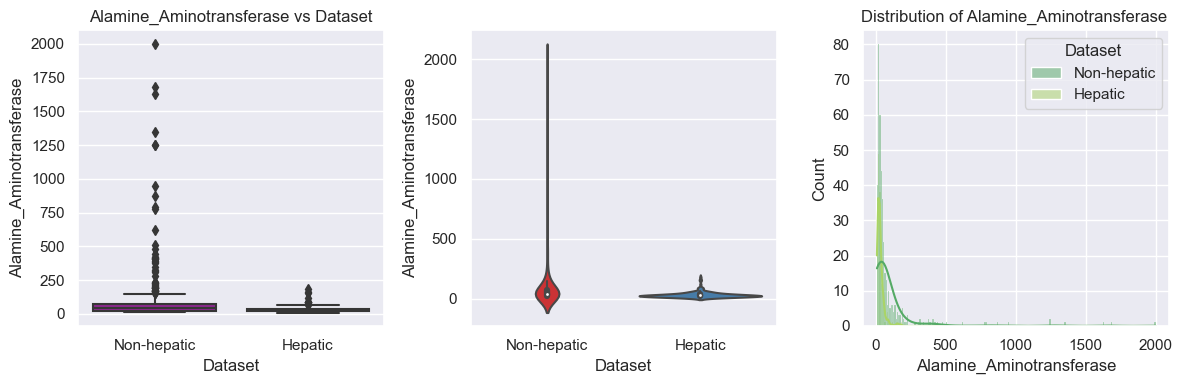

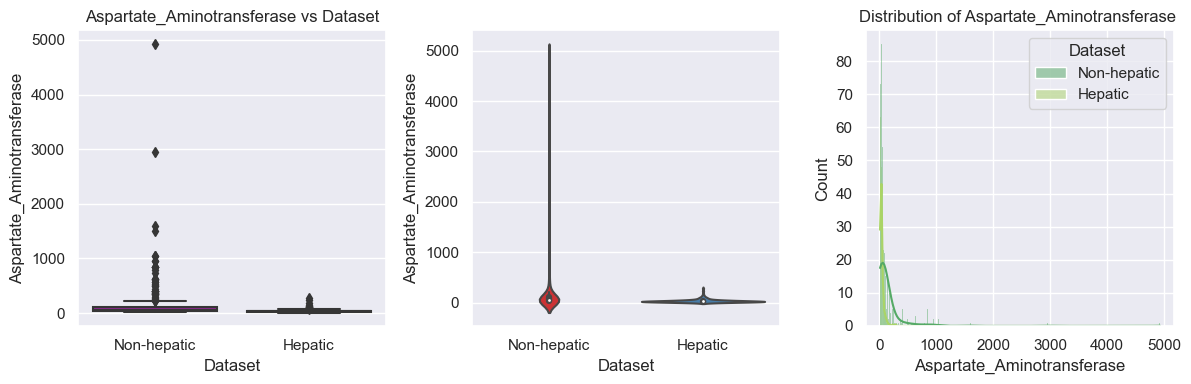

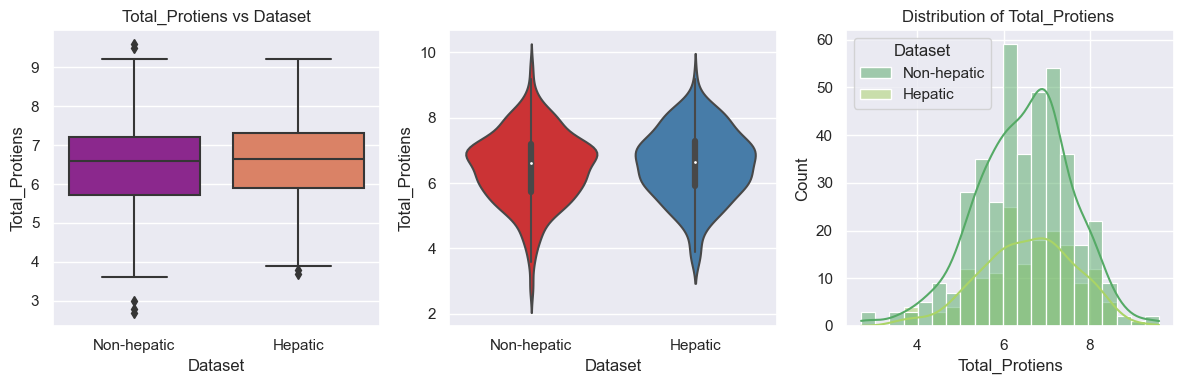

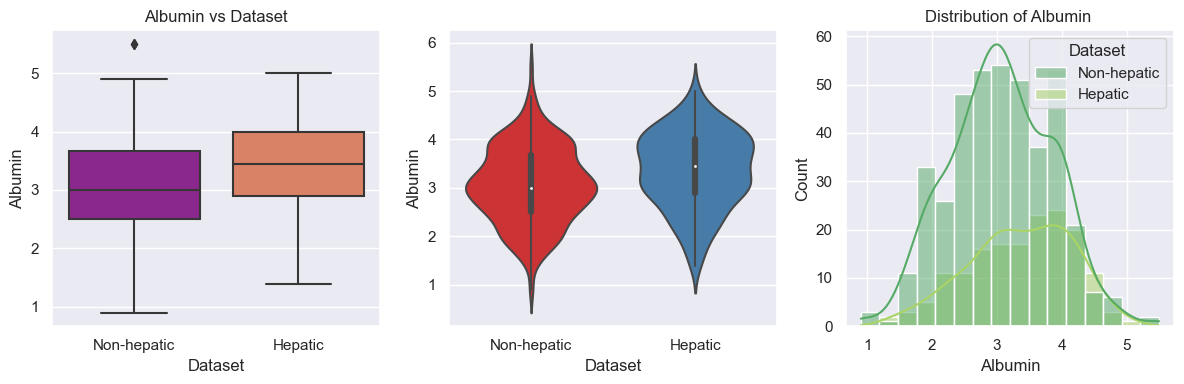

In [27]:
num_col = df.select_dtypes(include='number').columns
for col in num_col[:-1]:
    num_dist(col)
    


# Outlier Treatment : Not performed as it is a clinical dataset

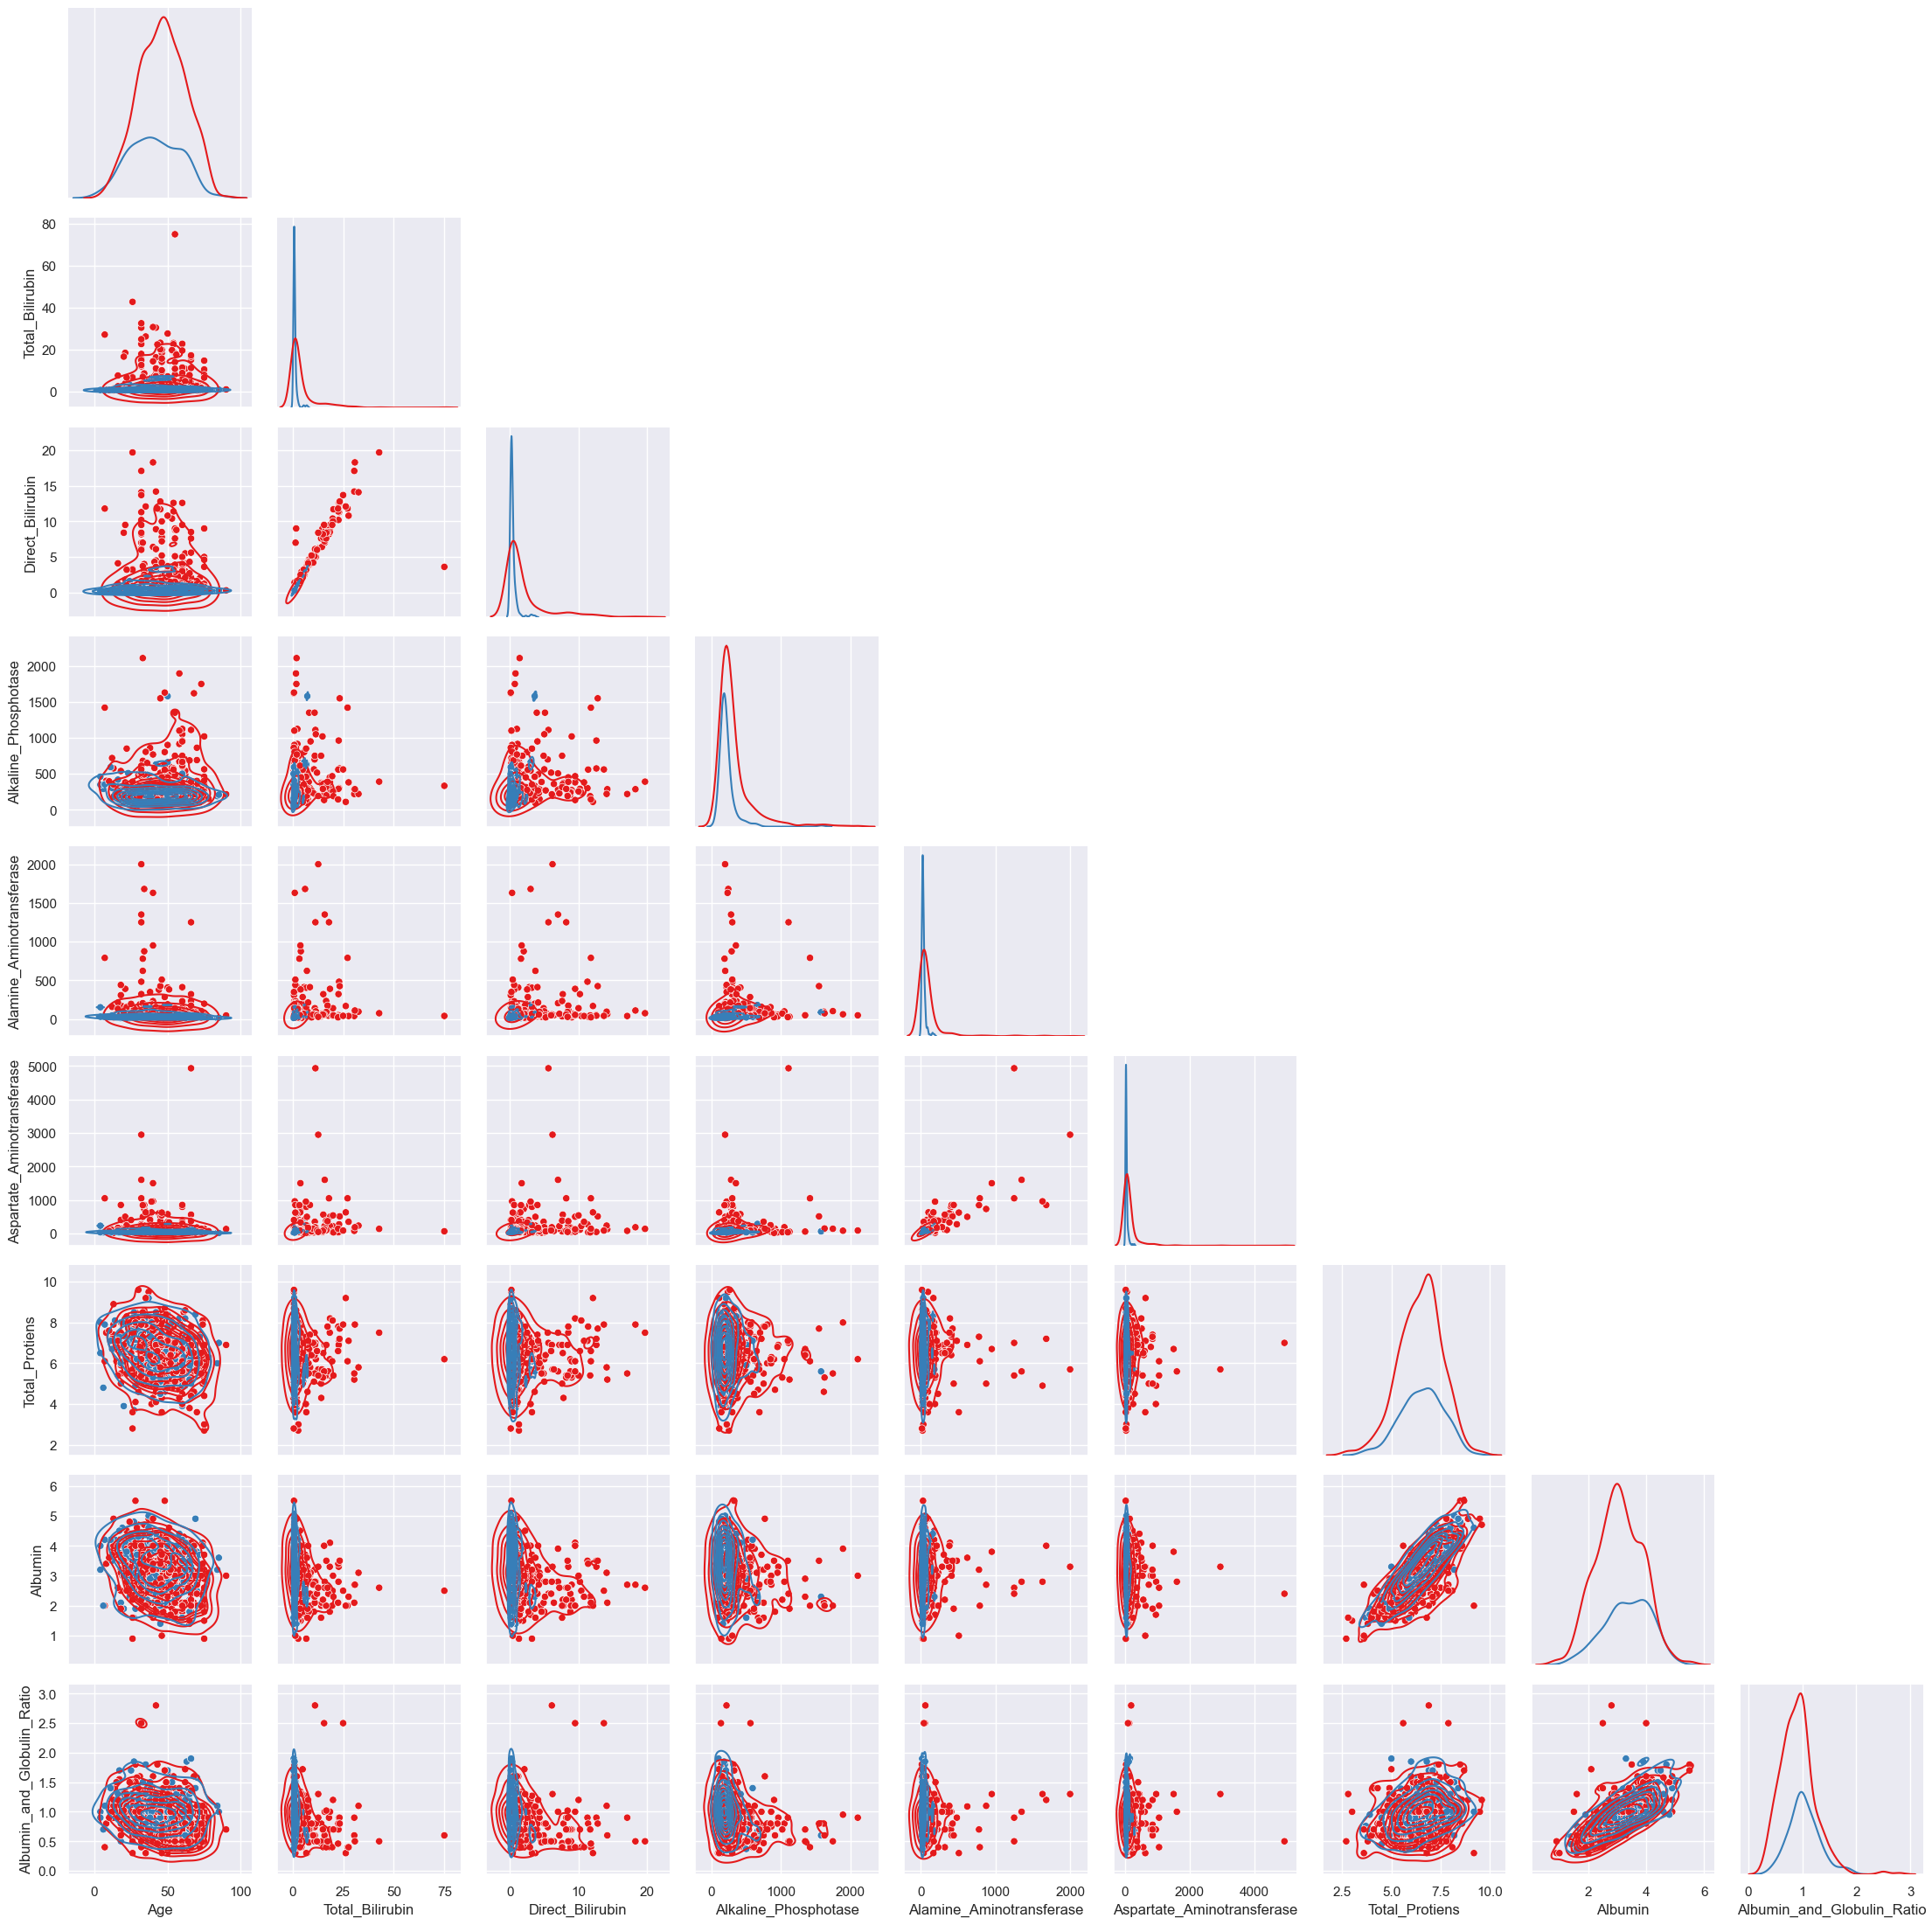

In [28]:
g = sns.PairGrid(df, hue='Dataset',palette ='Set1' , diag_sharey=False,corner =True)
g.map_lower(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
plt.show()

 <h2 style='; font-weight: bold; font-size:200%; color:blue'> 📊 Checking Imbalance between the different classes</h2> 

Dataset
Non-hepatic    406
Hepatic        164
Name: count, dtype: int64


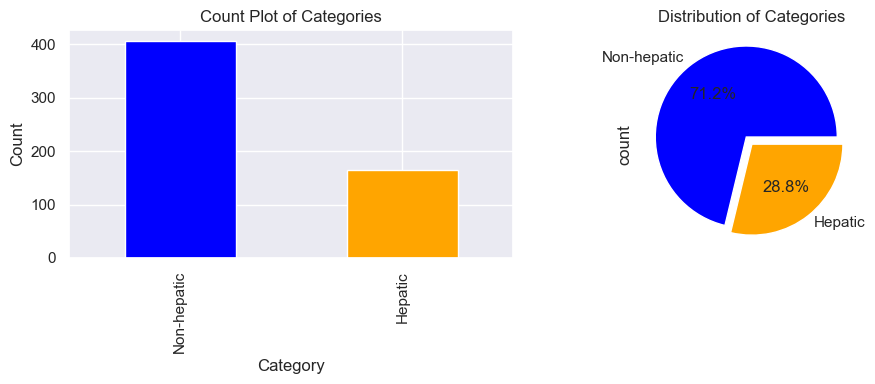

In [29]:
value_counts =df.Dataset.value_counts()
print(value_counts)


fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the bar plot on the first subplot (axes[0])
value_counts.plot(kind='bar', ax=axes[0],color=['blue', 'orange'])
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot of Categories')

plt.subplot(1,2,1)
value_counts.plot(
    kind='pie',
    ax=axes[1],
    explode=[ 0.1,0],     # Explode the second category to emphasize it
    autopct='%1.1f%%',         # Display percentage with one decimal place
    #shadow=True,               # Add a shadow effect to the chart
    colors=['blue', 'orange']  # Custom colors for the pie chart
)
axes[1].set_title('Distribution of Categories')


plt.tight_layout()

plt.show()

### </h2><font color=blue> ** Imbalancy in dataset found** </h2>


* A **class-imbalance** in the target feature is observed.
* To overcome this imbalancy, oversampling method is used for modeling.


<h2 style='; font-weight: bold; font-size:200%; color:blue'> 🛠️🧱⛏️ Model Building Predict Data and Evaluation of Model</h2> 


# Sklearn Libraries

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve , auc
from sklearn.datasets import make_classification

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

##  Encoding

In [31]:
df['Gender']=df['Gender'].astype('category')
df['Gender'] =df['Gender'].cat.codes

df['Dataset']=df['Dataset'].astype('category')
df['Dataset'] =df['Dataset'].cat.codes

## Splitting into target and independent features

In [32]:
target = "Dataset"
x = df.drop(columns=target)
y = df[target]

## Correlation between independent features

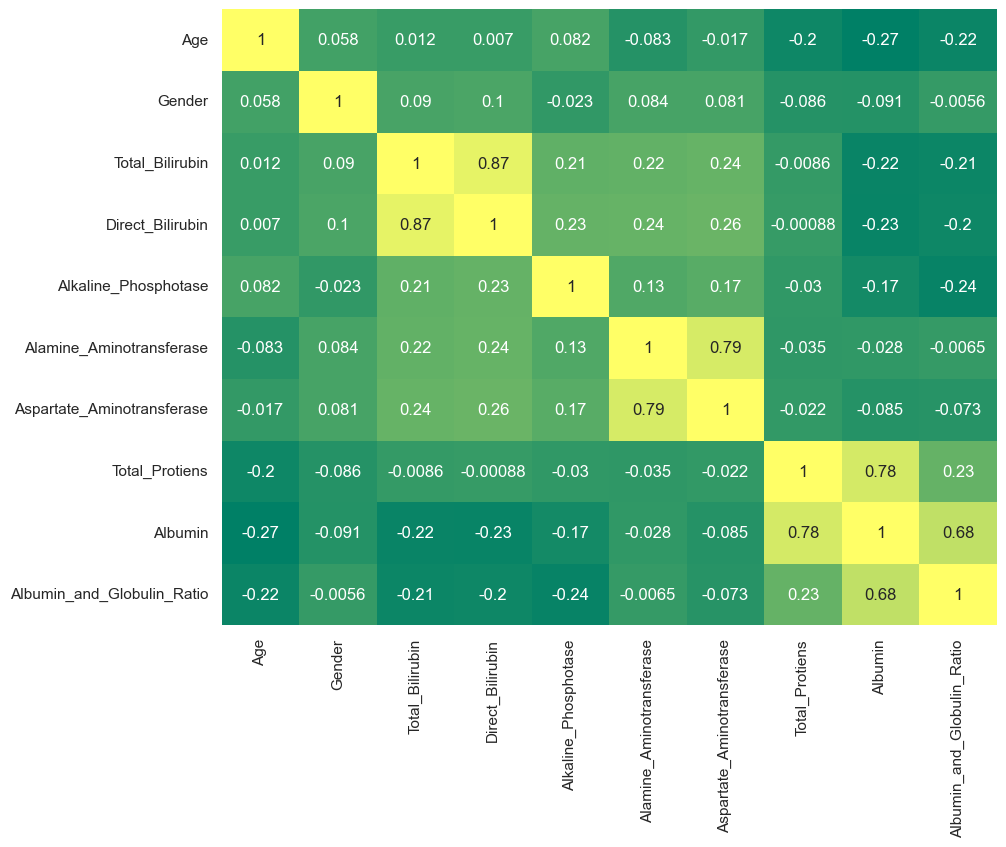

In [33]:
plt.figure(figsize=(10,8))
corr = x.corr()
sns.heatmap(corr, annot=True, cmap='summer',cbar=False)
plt.show()

## Feature Scaling

In [34]:
#StandardScaler in dataframe
sc = StandardScaler()
sc_x = pd.DataFrame(sc.fit_transform(x) , columns=x.columns)
sc_x.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.241741,-1.752549,-0.418647,-0.493702,-0.427421,-0.351482,-0.314428,0.279290,0.189737,-0.150889
1,1.056874,0.570597,1.210111,1.413923,1.661722,-0.086746,-0.032278,0.923059,0.064127,-0.653669
2,1.056874,0.570597,0.635255,0.919354,0.808927,-0.108807,-0.142385,0.463224,0.189737,-0.182313
3,0.810385,0.570597,-0.370743,-0.387723,-0.447823,-0.362513,-0.307546,0.279290,0.315348,0.163348
4,1.673096,0.570597,0.092336,0.177500,-0.394778,-0.290813,-0.173353,0.739125,-0.940754,-1.722078


## Imbalance treatment

In [35]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
# over = RandomOverSampler()
# x_over, y_over = over.fit_resample(sc_x,y)

smote = SMOTE()
x_over, y_over = smote.fit_resample(sc_x,y)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=0.25,random_state=123,  stratify = y_over)

## case 1: Logistic Regression

In [37]:

logit = LogisticRegression(#penalty =  'l2',
                           fit_intercept = True,
                          # multi_class = 'multinomial' ,
                           #dual = False,
                           class_weight = None,
                           solver = 'saga',
                           )



## case 2: Decision Tree

In [38]:
dtc = DecisionTreeClassifier(#min_samples_split= 4,
                             #min_samples_leaf = 2,
                              max_depth =8,
                             criterion='log_loss',
                             #class_weight= None,
                             random_state =123
                            )


## case 3: Bagging

In [39]:
bag = BaggingClassifier( oob_score = False,
                         n_estimators = 200,
                         max_samples = 1.0,
                         max_features = 3,
                         estimator = None,
                         bootstrap_features = False,
                         bootstrap = True, 
                         random_state =123)


## case 4: RandomForest

In [40]:
rfc  = RandomForestClassifier(n_estimators =200,
                                  min_samples_split = 8,
                                  min_samples_leaf = 2,
                                  max_features = 'log2',
                                  max_depth = None,
                                  criterion = 'gini',
                                  class_weight = None,
                                  bootstrap = True,
                                  oob_score = True,
                                  random_state =123
                                 )


## case-5 : KNearestNeighbour

In [41]:
knn  = KNeighborsClassifier( )


### case-6 : SupportVectorMachine

In [42]:
#kernel - linear
svm_linear = SVC(kernel='linear')

#kernel - poly
svm_poly = SVC(kernel='poly', C=4, gamma=1)

#kernel - sigmoid
svm_sigmoid = SVC(kernel='sigmoid',C=0.5, gamma=0.1)

#kernel - rbf
svm_rbf = SVC(kernel='rbf', C=3, gamma=1)

# model = svm_sigmoid
# model.fit(x_train,y_train)
# y_pred_train = model.predict(x_train)
# y_pred_test = model.predict(x_test)
# CV_train_acc =cross_val_score(model, x_train, y_train, cv =10).mean()
# CV_test_acc =cross_val_score(model, x_test, y_test, cv =10).mean()
   
# print(f'▬ Training Accuracy(CrossValidation), {CV_train_acc.round(2)*100} %' )
# print(f'▬ TestAccuracy(CrossValidation), {CV_test_acc.round(2)*100} %' )


## Evaluation of all models

In [43]:
estimators =[
          ('Logistic',logit, ),          
          ('DecisionTree',dtc, ),
          ('Bagging',bag,),
          ('RandomForest',rfc, ),
          ('KNearestNeighbour',knn,),
          ('SVM_linear',svm_linear),
          ('SVM_poly',svm_poly),
          ('SVM_sigmoid',svm_sigmoid),
          ('SVM_rbf',svm_rbf),
          ]
estimator_good =[]
estimator_bad =[]

for model_name, model in estimators:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    print('==='*10)
    print(model_name)
    print('==='*10)
#=======================================================
#            Cross Validation
#--------------------------------------------------------
    CV_train_acc =(cross_val_score(model, x_train, y_train, cv =10).mean()).round(2)*100
    CV_test_acc =(cross_val_score(model, x_test, y_test, cv =10).mean()).round(2)*100
    
    print(f'▬ Training Accuracy(CrossValidation), {CV_train_acc} %' )
    print(f'▬ TestAccuracy(CrossValidation), {CV_test_acc} %' )
    variance_CV = abs(CV_train_acc - CV_test_acc).round(2)
    
    print(f'Variance (CrossValidation) : {variance_CV}')
    if (variance_CV > 9) or (CV_train_acc > 99):
        print(f'ATTENTION : The  {model_name} Model is overfitting')
        
    if(CV_train_acc >70) & (CV_test_acc> 70):
        estimator_good.append((model_name, model))
    elif (CV_train_acc <70) | (CV_test_acc< 70):
        estimator_bad.append((model_name, model))
        
        print()

Logistic
▬ Training Accuracy(CrossValidation), 70.0 %
▬ TestAccuracy(CrossValidation), 74.0 %
Variance (CrossValidation) : 4.0
DecisionTree
▬ Training Accuracy(CrossValidation), 73.0 %
▬ TestAccuracy(CrossValidation), 64.0 %
Variance (CrossValidation) : 9.0

Bagging
▬ Training Accuracy(CrossValidation), 78.0 %
▬ TestAccuracy(CrossValidation), 74.0 %
Variance (CrossValidation) : 4.0
RandomForest
▬ Training Accuracy(CrossValidation), 78.0 %
▬ TestAccuracy(CrossValidation), 72.0 %
Variance (CrossValidation) : 6.0
KNearestNeighbour
▬ Training Accuracy(CrossValidation), 71.0 %
▬ TestAccuracy(CrossValidation), 71.0 %
Variance (CrossValidation) : 0.0
SVM_linear
▬ Training Accuracy(CrossValidation), 70.0 %
▬ TestAccuracy(CrossValidation), 72.0 %
Variance (CrossValidation) : 2.0
SVM_poly
▬ Training Accuracy(CrossValidation), 73.0 %
▬ TestAccuracy(CrossValidation), 65.0 %
Variance (CrossValidation) : 8.0

SVM_sigmoid
▬ Training Accuracy(CrossValidation), 69.0 %
▬ TestAccuracy(CrossValidation), 7

## ROC-AUC charecteristics

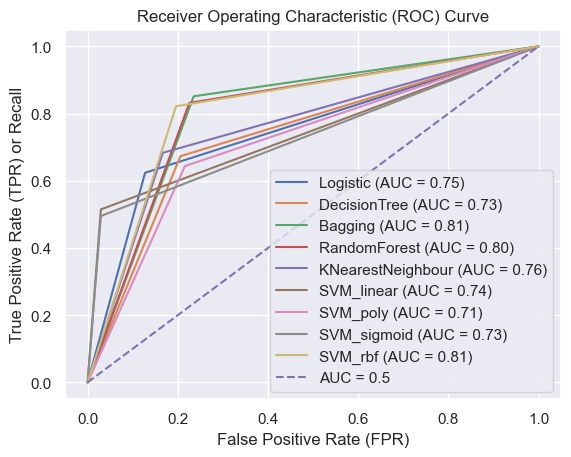

In [44]:
for model_name, model in estimators:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    y_test_binary = (y_test == 1).astype(int)
    y_pred_test_binary = (y_pred_test == 1).astype(int)
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_test_binary, pos_label=1)  
    roc_auc = auc(fpr, tpr)
    
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier (AUC = 0.5)

plt.plot([0, 1], [0, 1], 'm--', label='AUC = 0.5')

# Set labels and title

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

## VotingClassifier

In [45]:
estimator_good

[('Bagging',
  BaggingClassifier(max_features=3, n_estimators=200, random_state=123)),
 ('RandomForest',
  RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                         min_samples_split=8, n_estimators=200, oob_score=True,
                         random_state=123)),
 ('KNearestNeighbour', KNeighborsClassifier()),
 ('SVM_rbf', SVC(C=3, gamma=1))]

In [46]:
estimator_bad

[('DecisionTree',
  DecisionTreeClassifier(criterion='log_loss', max_depth=8, random_state=123)),
 ('SVM_poly', SVC(C=4, gamma=1, kernel='poly')),
 ('SVM_sigmoid', SVC(C=0.5, gamma=0.1, kernel='sigmoid'))]

------------------------------
VC_all
------------------------------
Train Accuracy(CV) : 77.0%

Test Accuracy(CV) : 74.0%

Test confusion matrix :
 [[90 12]
 [30 71]]

Test ROC-AUC : 0.79
------------------------------
VC_good
------------------------------
Train Accuracy(CV) : 77.0%

Test Accuracy(CV) : 76.0%

Test confusion matrix :
 [[86 16]
 [25 76]]

Test ROC-AUC : 0.80
------------------------------
VC_bad
------------------------------
Train Accuracy(CV) : 74.0%

Test Accuracy(CV) : 74.0%

Test confusion matrix :
 [[91 11]
 [40 61]]

Test ROC-AUC : 0.75


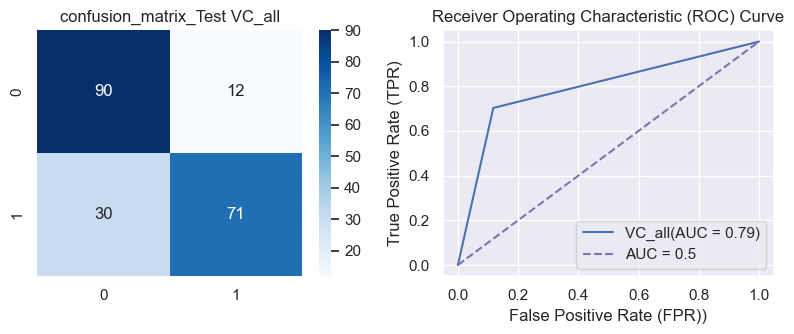

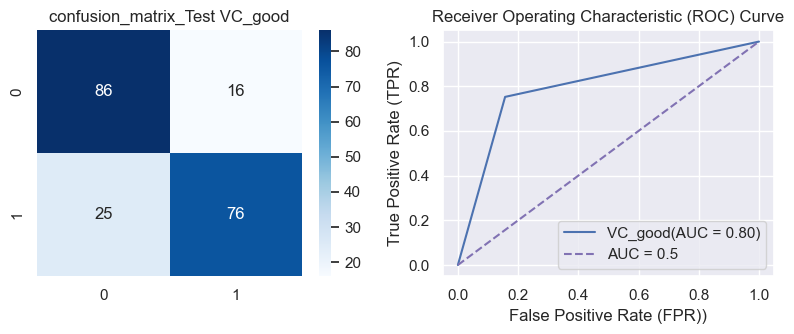

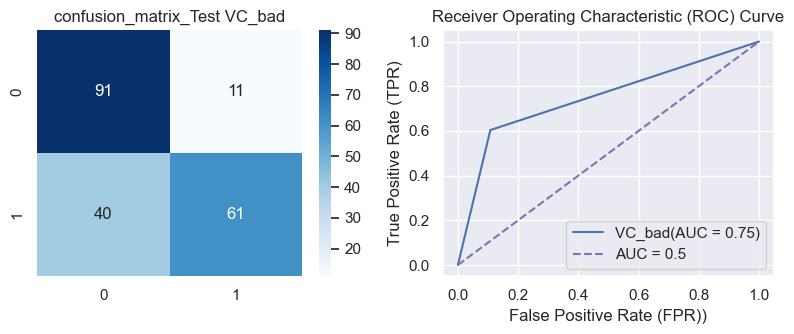

In [47]:
vc_all = VotingClassifier(estimators = estimators, voting='hard',)
vc_good = VotingClassifier(estimators = estimator_good, voting='hard',)
vc_bad = VotingClassifier(estimators = estimator_bad, voting='hard',)
model_vc= [('VC_all', vc_all), ('VC_good', vc_good), ('VC_bad', vc_bad)]

for model_name, model in model_vc:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    v_train_accuracy = (cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy').mean()).round(2)*100
    v_test_accuracy = (cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy').mean()).round(2)*100
    
    cm_test = confusion_matrix(y_test, y_pred_test)

    y_test_binary = (y_test == 1).astype(int)
    y_pred_test_binary = (y_pred_test == 1).astype(int)
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_test_binary, pos_label=1)  
    roc_auc = auc(fpr, tpr)
    print('--'*15)
    print(model_name)
    print('--'*15) 
    print(f'Train Accuracy(CV) : {v_train_accuracy}%')
    print()
    print(f'Test Accuracy(CV) : {v_test_accuracy}%')
    print()
    print(f'Test confusion matrix :\n {cm_test}')
    print()
    print(f'Test ROC-AUC : {roc_auc:.2f}')
    
    plt.figure(figsize = (8,3.5))
    plt.subplot(1,2,1)
    sns.heatmap(cm_test, annot = True, cmap= 'Blues')
    plt.title(f'confusion_matrix_Test {model_name}')
   
    plt.subplot(1,2,2)   
    plt.plot(fpr, tpr, label=f'{model_name}(AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier (AUC = 0.5)

    plt.plot([0, 1], [0, 1], 'm--', label='AUC = 0.5')

# Set labels and title

    plt.xlabel('False Positive Rate (FPR))')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.tight_layout()
# Show the plot
plt.show()

In [48]:

for model_name, model in model_vc:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
#=====================================================
#           Evalutaion Metrics
#-----------------------------------------------------    
    print( '--'*30)
    print( f'Classification_report:{model_name}\n')       
#     print( '--'*30)
#     print( 'Train:') 
#     print( classification_report(y_train, y_pred_train))
#    print( 'Test:')  
    print( '--'*30)
    print(classification_report(y_test, y_pred_test))
    #print( '--'*30)

------------------------------------------------------------
Classification_report:VC_all

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       102
           1       0.86      0.70      0.77       101

    accuracy                           0.79       203
   macro avg       0.80      0.79      0.79       203
weighted avg       0.80      0.79      0.79       203

------------------------------------------------------------
Classification_report:VC_good

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       102
           1       0.83      0.75      0.79       101

    accuracy                           0.80       203
   macro avg       0.80      0.80      0.80       203
weighted avg       0.80      0.80      0.80       203

-----------------------------------------

# Conclusion

### - In this project all the models are tested individually. 
    |----------------------------------|
    |     Model   |  Train   | Test    |
    |             |  Accuracy| Accuracy|
    |-------------|----------|---------| 
    | Logistic    |    70    |   74    |
    | DecisionTree|    73    |   64    |
    | Bagging     |    78    |   74    |
    | RandomForest|    78    |   72    |
    | KNN         |    71    |   71    |
    | SVM_linear  |    70    |   72    |
    | SVM_poly    |    73    |   65    |
    | SVM_sigmoid |    69    |   74    |
    | SVM_rbf     |    80    |   71    |
    |__________________________________|
### -Three different Votingclassifier with `estimator_all`, `estimator_good`, `estimator_bad` is used to check the performance of the model. 
> ### 1. `estimator_all` is constructed with all the individual models.
> ### 2.`estimator_good` is constructed with  the individual models whose train and test accuracy is above 70%.
> ### 3.`estimator_bad` is constructed with all the individual models whose train or test accuracy is below 70%.
    |-----------------|----------|---------|-----------|-------------|
    | Estimator       |  Train   | Test    |   ROC     | Confusion   |
    |                 |  Accuracy| Accuracy|           |   Matrix    |
    |-----------------|----------|---------|-----------|-------------|
    |  estimator_all  |    77    |   74    |    0.79   |   [[90 12]  |
    |                 |          |         |           |   [30 71]]  |
    |-----------------|----------|---------|-----------|-------------|
    |  estimator_good |    77    |   76    |    0.80   |  [[86  16]   |
    |                 |          |         |           |  [25  76]]  |
    |-----------------|----------|---------|-----------|-------------|
    |  estimator_bad  |    74    |   74    |    0.75   |   [[91 11]   |
    |                 |          |         |           |   [40 61]]  |
    |_________________|__________|_________|___________|_____________|